# PROJECT

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

#### dataset:https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

# Introduction

Using a Car Price dataset, we will seek to find insights and create a Machine Learning model that can manipulate the design of the cars,the business strategy etc.to meet certain price levels.Further,the model will be a good way for the management to understand the pricing dynamis of a new market.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error

### Loading dataset

In [3]:
import pandas as pd
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.shape

(205, 26)

### Data Preprocessing

In [11]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### There is no duplicate and null values.

#### Checking Outliers

In [15]:
numeric_cols = df.drop('price',axis=1).select_dtypes(include = np.number).columns
categorical_cols = df.select_dtypes(exclude = np.number).columns
print("Categorical Columns are : ", categorical_cols)
print("\nNumeric Columns and their Skewness: \n", numeric_cols)

Categorical Columns are :  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

Numeric Columns and their Skewness: 
 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [17]:
#checking skewness
df[numeric_cols].skew()

car_ID              0.000000
symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
dtype: float64

#### Skewness measures the asymmetry of the data distribution:

Positive Skew (Right Skew): If skewness > 0, the data is skewed to the right, with a longer tail on the right side.
Negative Skew (Left Skew): If skewness < 0, the data is skewed to the left, with a longer tail on the left side.
Symmetric Distribution: If skewness ≈ 0, the data is fairly symmetrical.

In [23]:
#displaying numerical columns
df[numeric_cols]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


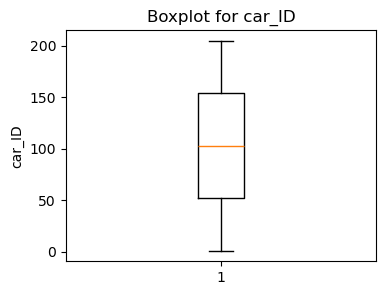

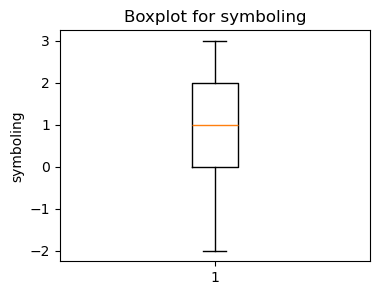

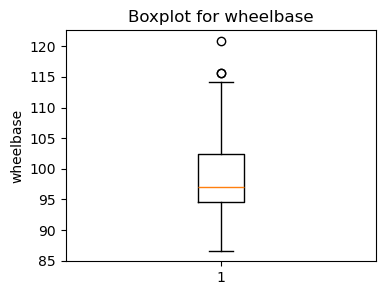

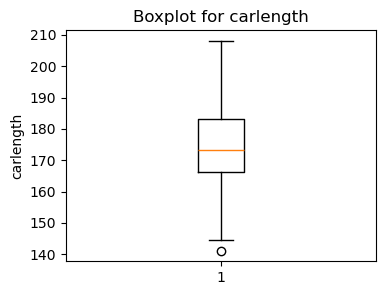

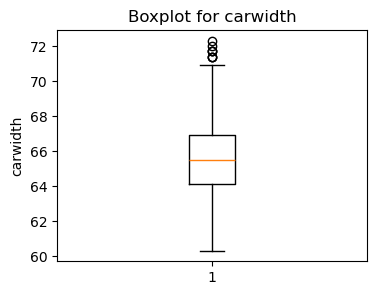

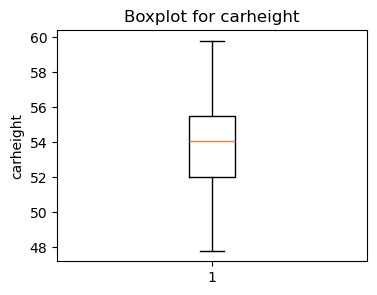

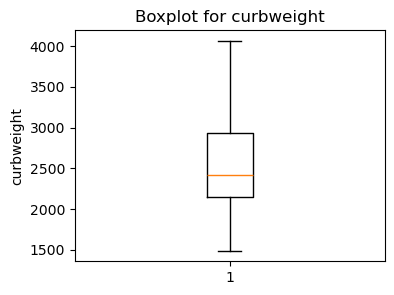

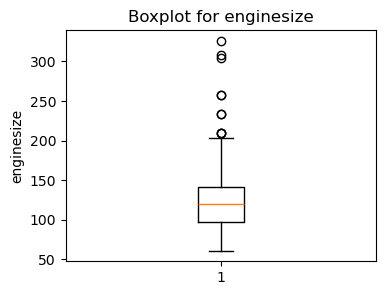

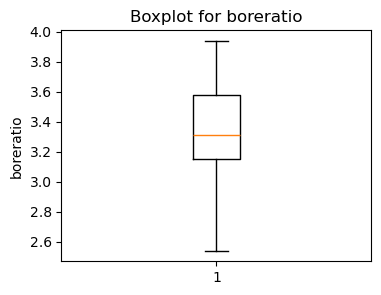

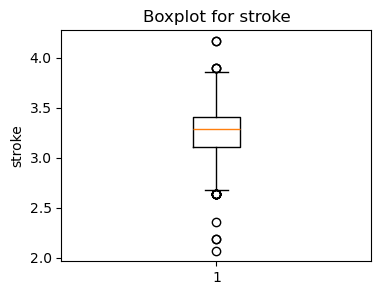

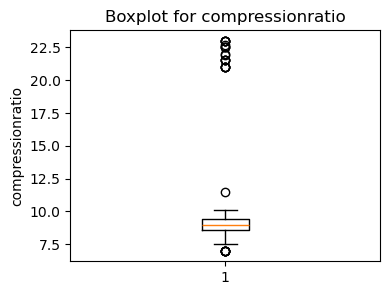

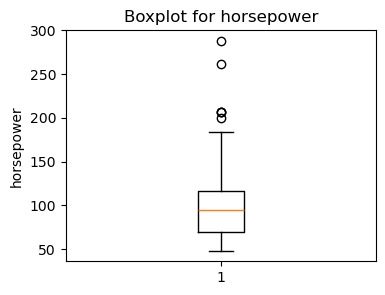

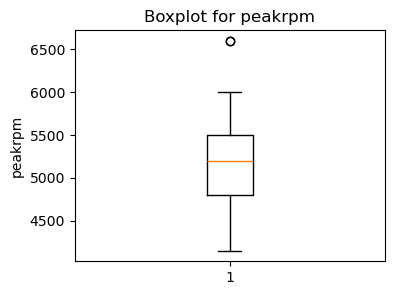

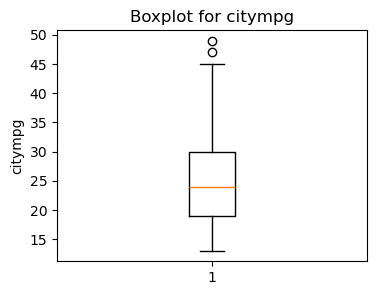

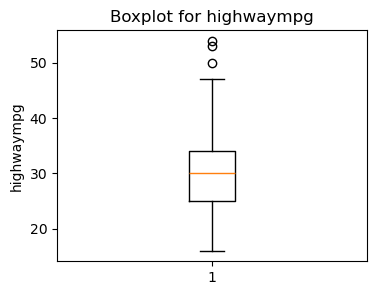

In [25]:
# boxplot for numerical columns
import matplotlib.pyplot as plt
for column in numeric_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.show()

#### Here we can see the presence of outliers,but not removed due to small dataset.By removing outliers, heavy dataloss may occur.

#### Data Analysis- Correlation heat map for numerical columns

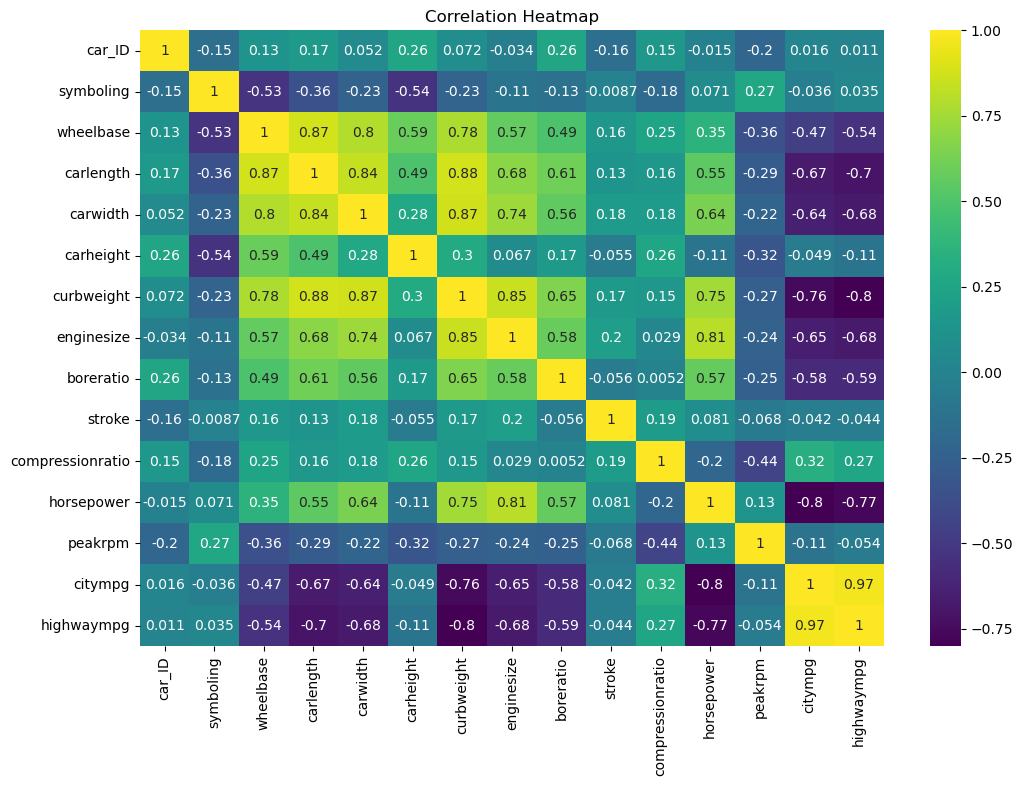

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()


### Feature Engineering

In [89]:
#Encoding- process of converting categorical data into numerical data.
# Label encoding used for ordinal data and target variable.
# onehot encoding used for nominal data and independent variables.
# In this dataset target variable have numerical data, there is no need to encoding.
# we need to encoding some independent variables here.

#### Onehot encoding

In [19]:
#displaying categorical columns
categorical_cols = df.select_dtypes(exclude = np.number).columns
categorical_cols


Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [21]:
df_encoded = pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [23]:
df_encoded

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [25]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 191 entries, car_ID to fuelsystem_spfi
dtypes: bool(175), float64(8), int64(8)
memory usage: 60.8 KB


### Feature Scaling

In [27]:
print("\nNumeric Columns : \n", numeric_cols)


Numeric Columns : 
 Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [29]:
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [31]:
df_encoded.drop(columns=['car_ID'], axis=1, inplace=True) 
df_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,False,False,False,False,False,False,False,True,False,False
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,...,False,False,False,False,False,False,False,True,False,False
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,...,False,False,False,False,False,False,False,True,False,False
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,...,False,False,False,False,False,False,False,True,False,False
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,...,False,False,False,False,False,False,False,True,False,False
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,...,False,False,False,False,False,False,False,True,False,False
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,...,False,False,False,False,False,False,False,True,False,False
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,...,False,False,False,False,False,True,False,False,False,False


### Correlation based Feature selection

In [33]:
df_encoded.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_idi,-0.194311,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,0.984356,...,-0.023020,-0.023020,-0.046383,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuelsystem_mfi,0.122067,-0.033294,-0.004831,0.012832,-0.101245,0.034431,0.049033,0.070030,0.144263,-0.055528,...,-0.004902,-0.004902,-0.009877,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuelsystem_mpfi,0.012532,0.348891,0.511374,0.461896,0.108685,0.520220,0.483520,0.419335,-0.110280,-0.311035,...,-0.064430,0.076082,-0.059039,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuelsystem_spdi,0.181939,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,0.004490,-0.004213,0.251259,-0.153726,...,-0.015003,-0.015003,-0.030229,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


In [35]:
#drop target feauture-price
corr = df_encoded.drop('price', axis=1).corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,...,0.065707,-0.047012,0.245950,-0.034069,0.212471,-0.194311,0.122067,0.012532,0.181939,0.065707
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,...,-0.120709,0.037803,-0.081174,-0.396505,-0.070124,0.308346,-0.033294,0.348891,-0.117359,-0.032129
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,...,-0.187445,0.100413,-0.057877,-0.487237,-0.049998,0.212679,-0.004831,0.511374,-0.079790,-0.008245
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,...,-0.183473,0.153516,-0.013699,-0.522594,-0.011834,0.233880,0.012832,0.461896,-0.046399,-0.023158
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,...,-0.015076,-0.170181,-0.238720,-0.079418,-0.206225,0.284631,-0.101245,0.108685,-0.278615,-0.066778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuelsystem_idi,-0.194311,0.308346,0.212679,0.233880,0.284631,0.217275,0.069594,0.054451,0.241829,0.984356,...,-0.023020,-0.023020,-0.046383,-0.226565,-0.040070,1.000000,-0.023020,-0.302574,-0.070457,-0.023020
fuelsystem_mfi,0.122067,-0.033294,-0.004831,0.012832,-0.101245,0.034431,0.049033,0.070030,0.144263,-0.055528,...,-0.004902,-0.004902,-0.009877,-0.048245,-0.008532,-0.023020,1.000000,-0.064430,-0.015003,-0.004902
fuelsystem_mpfi,0.012532,0.348891,0.511374,0.461896,0.108685,0.520220,0.483520,0.419335,-0.110280,-0.311035,...,-0.064430,0.076082,-0.059039,-0.634114,-0.112147,-0.302574,-0.064430,1.000000,-0.197195,-0.064430
fuelsystem_spdi,0.181939,-0.117359,-0.079790,-0.046399,-0.278615,-0.002434,0.004490,-0.004213,0.251259,-0.153726,...,-0.015003,-0.015003,-0.030229,-0.147658,-0.026114,-0.070457,-0.015003,-0.197195,1.000000,-0.015003


In [37]:
#correlation with price
correlation_matrix = df_encoded.corr()
corr_with_price = correlation_matrix["price"].abs().sort_values(ascending=False)
selected_features = corr_with_price[corr_with_price > 0.3].index.tolist()
selected_features.remove("price")

In [39]:
corr_with_price

price                         1.000000
enginesize                    0.874145
curbweight                    0.835305
horsepower                    0.808139
carwidth                      0.759325
                                ...   
CarName_nissan dayz           0.001953
CarName_alfa-romero giulia    0.001918
CarName_peugeot 304           0.000674
CarName_nissan clipper        0.000589
CarName_volkswagen rabbit     0.000161
Name: price, Length: 190, dtype: float64

In [41]:
selected_features

['enginesize',
 'curbweight',
 'horsepower',
 'carwidth',
 'cylindernumber_four',
 'highwaympg',
 'citympg',
 'carlength',
 'drivewheel_rwd',
 'drivewheel_fwd',
 'wheelbase',
 'boreratio',
 'fuelsystem_mpfi',
 'fuelsystem_2bbl',
 'cylindernumber_six',
 'enginetype_ohcv',
 'enginetype_ohc',
 'enginelocation_rear']

In [43]:
X = df_encoded[selected_features]
y = df_encoded['price']

## Model Implementation

In [67]:
X

,enginesize,curbweight,horsepower,carwidth,cylindernumber_four,highwaympg,citympg,carlength,drivewheel_rwd,drivewheel_fwd,wheelbase,boreratio,fuelsystem_mpfi,fuelsystem_2bbl,cylindernumber_six,enginetype_ohcv,enginetype_ohc,enginelocation_rear
0,0.260377,0.411171,0.262500,0.316667,True,0.289474,0.222222,0.413433,True,False,0.058309,0.664286,True,False,False,False,False,False
1,0.260377,0.411171,0.262500,0.316667,True,0.289474,0.222222,0.413433,True,False,0.058309,0.664286,True,False,False,False,False,False
2,0.343396,0.517843,0.441667,0.433333,False,0.263158,0.166667,0.449254,True,False,0.230321,0.100000,True,False,True,True,False,False
3,0.181132,0.329325,0.225000,0.491667,True,0.368421,0.305556,0.529851,False,True,0.384840,0.464286,True,False,False,False,True,False
4,0.283019,0.518231,0.279167,0.508333,False,0.157895,0.138889,0.529851,False,False,0.373178,0.464286,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.301887,0.567882,0.275000,0.716667,True,0.315789,0.277778,0.711940,True,False,0.655977,0.885714,True,False,False,False,True,False
201,0.301887,0.605508,0.466667,0.708333,True,0.236842,0.166667,0.711940,True,False,0.655977,0.885714,True,False,False,False,True,False
202,0.422642,0.591156,0.358333,0.716667,False,0.184211,0.138889,0.711940,True,False,0.655977,0.742857,True,False,True,True,False,False
203,0.316981,0.670675,0.241667,0.716667,False,0.289474,0.361111,0.711940,True,False,0.655977,0.335714,False,False,True,False,True,False


In [69]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Linear Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)


X_train size:  (164, 18)
X_test size:  (41, 18)
y_train size:  (164,)
y_test size:  (41,)


In [47]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
# Predictions
y_pred = model.predict(X_test)
y_pred #PREDICTED

array([24566.18205434, 22008.23237964,  9923.28105427, 12111.66981157,
       29214.58767506,  6459.41194487,  8089.98835722,  7259.73396   ,
        8663.34371193,  7863.21720494, 19180.8746986 ,  8949.59052713,
       15989.6889782 , 12152.84687388, 38420.85704071,  6360.48874426,
        4255.32579419, 15179.02611576, 10342.57915902,  8341.82990741,
       10786.78458542, 16790.45075244,  6577.71774699,  5446.27326438,
        6363.73549642, 25429.73168953, 15339.47515509, 17201.89830838,
        6282.05645946, 16767.97361519, 28378.7491267 ,  6285.48678125,
        7181.67119817, 18879.34008955,  7679.74052347, 28221.49122442,
        9555.15978221, 12034.18826818,  6080.53815857, 15494.8207169 ,
        7181.37631   ])

In [51]:
# Assuming y_pred and y_test are numpy arrays or pandas Series
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})
(results_df)

,Actual Values,Predicted Values
15,30760.000,24566.182054
9,17859.167,22008.232380
100,9549.000,9923.281054
132,11850.000,12111.669812
68,28248.000,29214.587675
95,7799.000,6459.411945
159,7788.000,8089.988357
162,9258.000,7259.733960
147,10198.000,8663.343712
182,7775.000,7863.217205


In [53]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 2215.9595740589307
MSE: 12107886.66987072
R2: 0.8466269321608537


C:\Users\hp\AppData\Local\Temp\ipykernel_15088\3982695444.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


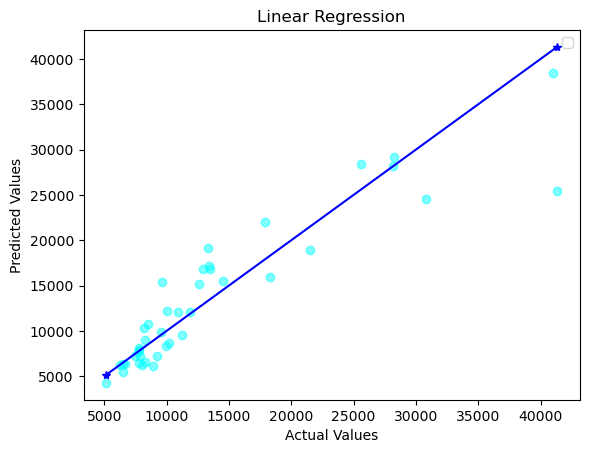

In [55]:
#visualize result
plt.scatter(y_test, y_pred, color='cyan', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue',marker='*')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title('Linear Regression')
plt.legend()
plt.show()

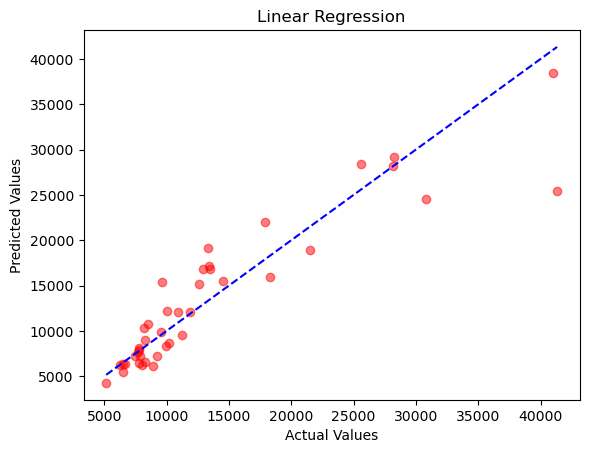


	Feature Importance for : 	 Linear Regression 
 enginesize             19795.025698
enginelocation_rear    14886.159674
curbweight              9169.326713
carwidth                6582.058502
cylindernumber_four     4803.596512
cylindernumber_six      4292.736794
horsepower              3912.326584
carlength               3049.466015
wheelbase               2503.606146
boreratio               2097.768180
enginetype_ohcv         1791.246630
drivewheel_rwd          1518.363379
enginetype_ohc          1239.572585
fuelsystem_mpfi          951.184859
citympg                  414.259827
drivewheel_fwd           348.579618
highwaympg               260.815317
fuelsystem_2bbl          224.041059
dtype: float64 





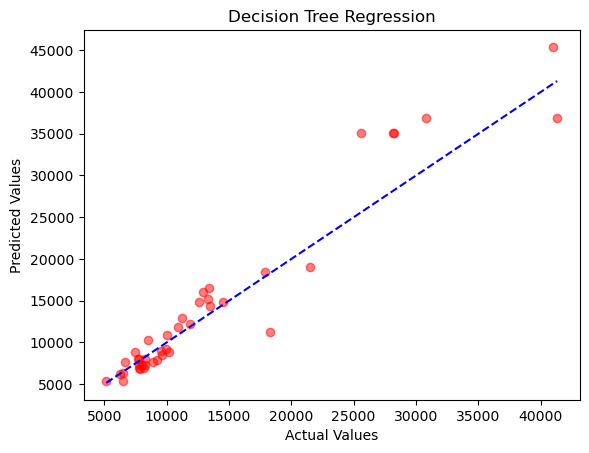


	Feature Importance for : 	 Decision Tree Regression 
 enginesize             0.652684
curbweight             0.272674
carwidth               0.027057
highwaympg             0.018191
horsepower             0.017504
cylindernumber_four    0.003199
wheelbase              0.002663
citympg                0.002384
carlength              0.001597
drivewheel_fwd         0.000809
boreratio              0.000673
cylindernumber_six     0.000310
enginetype_ohc         0.000209
drivewheel_rwd         0.000038
fuelsystem_mpfi        0.000007
fuelsystem_2bbl        0.000000
enginetype_ohcv        0.000000
enginelocation_rear    0.000000
dtype: float64 



[5.53015342e-01 2.96338957e-01 3.87138343e-02 1.72167480e-02
 1.50750082e-03 4.87606369e-02 7.77117350e-03 1.22534019e-02
 1.50083832e-03 5.03040130e-04 9.18789795e-03 7.32235130e-03
 3.14306842e-03 4.84526684e-04 6.26499365e-04 4.65901187e-04
 1.17107546e-03 1.72066748e-05]
	 0.5530153422772527


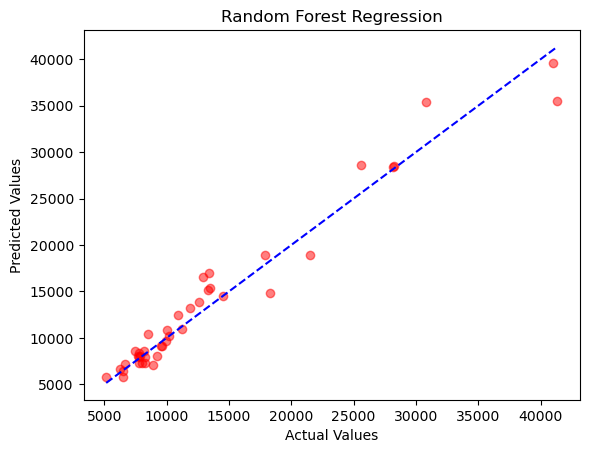


	Feature Importance for : 	 Random Forest Regression 
                 Feature  Gini Importance
0            enginesize         0.553015
1            curbweight         0.296339
5            highwaympg         0.048761
2            horsepower         0.038714
3              carwidth         0.017217
7             carlength         0.012253
10            wheelbase         0.009188
6               citympg         0.007771
11            boreratio         0.007322
12      fuelsystem_mpfi         0.003143
4   cylindernumber_four         0.001508
8        drivewheel_rwd         0.001501
16       enginetype_ohc         0.001171
14   cylindernumber_six         0.000626
9        drivewheel_fwd         0.000503
13      fuelsystem_2bbl         0.000485
15      enginetype_ohcv         0.000466
17  enginelocation_rear         0.000017 





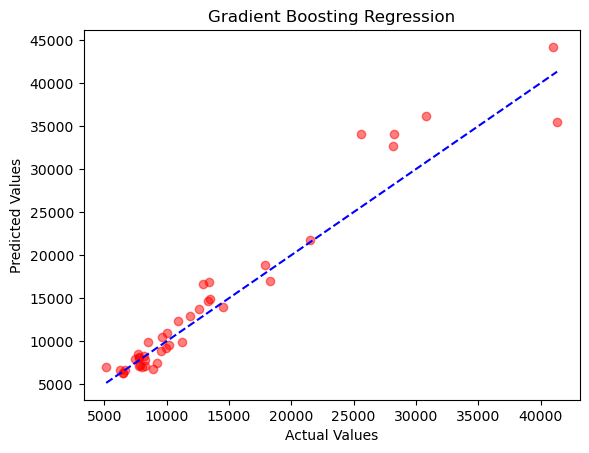


	Feature Importance for : 	 Gradient Boosting Regression 
                 Feature  Gini Importance
0            enginesize       100.000000
1            curbweight        27.450679
5            highwaympg        12.344670
2            horsepower         9.444506
10            wheelbase         3.089600
4   cylindernumber_four         2.958284
8        drivewheel_rwd         2.453838
7             carlength         2.425355
3              carwidth         2.121787
11            boreratio         1.367874
6               citympg         1.129136
16       enginetype_ohc         0.385520
13      fuelsystem_2bbl         0.228023
12      fuelsystem_mpfi         0.074858
14   cylindernumber_six         0.071453
9        drivewheel_fwd         0.037939
15      enginetype_ohcv         0.018206
17  enginelocation_rear         0.017413 





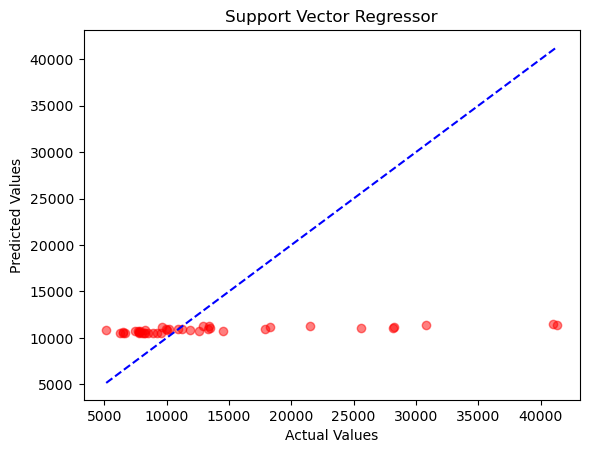


	Feature Importance for : 	 Support Vector Regressor 
 [] 





,Model,Accuracy (R2),MSE,MAE,R2-Score
2,Random Forest Regression,0.957255,3.374448e+06,1261.532492,0.957255
3,Gradient Boosting Regression,0.919451,6.358885e+06,1687.566736,0.919451
1,Decision Tree Regression,0.885583,9.032540e+06,1991.136171,0.885583
0,Linear Regression,0.846627,1.210789e+07,2215.959574,0.846627
4,Support Vector Regressor,-0.037361,8.189347e+07,5522.098546,-0.037361


In [66]:
from sklearn.inspection import permutation_importance
models = {
 'Linear Regression' : LinearRegression(),
 'Decision Tree Regression' : DecisionTreeRegressor(random_state = 0),
 'Random Forest Regression' : RandomForestRegressor(n_estimators=100, random_state=42),
 'Gradient Boosting Regression' : GradientBoostingRegressor(n_estimators=100, random_state=42),
 'Support Vector Regressor' : SVR(kernel = 'poly')
}
# Train and Evaluate Models max_depth=None,min_samples_split=2
results = []
for name , model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    feature_importance=[]
    if(name == 'Linear Regression' ):
        feature_importance = pd.Series(np.abs(model.coef_), index=X_train.columns).sort_values(ascending=False)
    if(name == 'Decision Tree Regression' ):
        feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    if(name == 'Random Forest Regression'):
        importances = model.feature_importances_ 
        print(importances)
        print('\t',importances[0])
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
    if(name == 'Gradient Boosting Regression'):
        feature_importance = model.feature_importances_
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': feature_importance}).sort_values('Gini Importance', ascending=False)
 
    metrics = {
        'Model': name,
        'Accuracy (R2)': r2_score(y_test, y_pred),
        'MSE': mse,
        'MAE': mae,
        'R2-Score': r2 
    }
        
    results.append(metrics)

    plt.scatter(y_test, y_pred, color='red', alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='dashed')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.show() 
    
    print('\n\tFeature Importance for : \t',name,'\n',feature_importance,'\n\n\n') 
    
# Create a DataFrame from the results
results_df = pd.DataFrame(results) 

# Sort the DataFrame by accuracy in descending order
results_df_sorted = results_df.sort_values(by='R2-Score', ascending=False) 

# Print the sorted DataFrame
results_df_sorted 

## Here we can understand that Random Forest Regression is the best model and it's accuracy is 0.95
## Worst model is Support Vector Regressor and it's accuracy is very low

In [68]:
if(name == 'Support Vector Regressor'):
 results = permutation_importance(model, X, y)
 importances = results.importances_mean
 print(importances)
 print('\t',importances[0])
 feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)

[ 3.13463908e-03  5.18950887e-03  2.76038786e-03  3.93395428e-03
 -2.43743991e-03  9.80095803e-05  2.91095332e-04  3.60105171e-03
  1.33272410e-02  4.93915449e-03  2.49293072e-03  2.94825019e-03
  9.53234281e-03  5.72860580e-03  3.17118466e-03  1.38492252e-03
 -1.51493029e-03  1.71713417e-04]
	 0.0031346390819189996


In [70]:
feature_importance

,Feature,Gini Importance
8,drivewheel_rwd,0.013327
12,fuelsystem_mpfi,0.009532
13,fuelsystem_2bbl,0.005729
1,curbweight,0.005190
9,drivewheel_fwd,0.004939
3,carwidth,0.003934
7,carlength,0.003601
14,cylindernumber_six,0.003171
0,enginesize,0.003135
11,boreratio,0.002948


## Hyperparameter Tuning

### Hyperparameter Tuning performing on Random Forest Regressor

In [92]:
from sklearn.model_selection import GridSearchCV
param_grid = {
 #'n_estimators': [int(x) for x in np.linspace(start=100, stop=105, num=6)],
 'n_estimators': [int(x) for x in range(50,200,5)],
 'max_depth': [10, None],
 'random_state': [42],
 'min_samples_split': [2,3,4, 5, None],
 #'max_features': ['sqrt']
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)


C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
300 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, None],
                         'min_samples_split': [2, 3, 4, 5, None],
                         'n_estimators': [50, 55, 60, 65, 70, 75, 80, 85, 90,
                                          95, 100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, 150, 155, 160, 165,
                                          170, 175, 180, 185, 190, 195],
                         'random_state': [42]})

In [84]:
# Best Parameters
print("Best Parameters:", grid_search.best_params_)
# Predictions
y_pred = grid_search.best_estimator_.predict(X_test)
print('MSE : ',mean_squared_error(y_test, y_pred))
print('MAE : ',mean_absolute_error(y_test, y_pred))
print('R2-Score : ',r2_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 90, 'random_state': 42}
MSE :  3306742.108207167
MAE :  1243.5041246612468
R2-Score :  0.9581128238546658


In [85]:
param_grid

{'n_estimators': [50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  100,
  105,
  110,
  115,
  120,
  125,
  130,
  135,
  140,
  145,
  150,
  155,
  160,
  165,
  170,
  175,
  180,
  185,
  190,
  195],
 'max_depth': [10, None],
 'random_state': [42],
 'min_samples_split': [2, 3, 4, 5, None]}

### Before Hyperparameter Tuning accuracy of Randomforest Regressor is 0.957255 that means 95.7255%.After HyperParameter Tuning it's accuracy increased to 0.95811 that means 95.811

In [93]:
y_pred

array([35479.6       , 18691.92222222,  9132.77777778, 13184.34444444,
       28015.5       ,  7322.23333333,  7877.24444444,  8078.71111111,
       10214.2       ,  8218.21111111, 15232.83888889,  7988.14444444,
       14848.2       , 10827.25555556, 39368.19444444,  6475.33333333,
        5804.48333333, 13840.72222222,  8571.48888889,  9602.8       ,
       10396.70925926, 15282.7       ,  7314.98888889,  5854.23240741,
        7245.12222222, 35589.04444444,  9207.31111111, 16998.16666667,
        7312.08888889, 16612.16666667, 28063.50555556,  6607.14444444,
        7976.31111111, 19044.72222222,  8064.44444444, 27918.19444444,
       11106.90555556, 12449.72222222,  7020.71851852, 14472.22222222,
        8530.35555556])

In [98]:
hyper_result_df=pd.DataFrame({
 'Actual Values': y_test,
 'Predicted Values': y_pred})
hyper_result_df

,Actual Values,Predicted Values
15,30760.000,35479.600000
9,17859.167,18691.922222
100,9549.000,9132.777778
132,11850.000,13184.344444
68,28248.000,28015.500000
95,7799.000,7322.233333
159,7788.000,7877.244444
162,9258.000,8078.711111
147,10198.000,10214.200000
182,7775.000,8218.211111
